<p>
    


</p>


# Trial Report
Pears plantation, Spain, 2019-2022

Dr. Andre Moreira, 2023

## Introduction

Trial in Spain, follwing the tree development in a pear orchard. Some trees were treated with a special new product (code-named here as "NH"), others treated with a common product ("control"). 
The orchard was planted in 2019, we measured the tree trunks in 2022, using it as an accepted proxy for tree development and health.

In [1]:
%%html
<style> table {float:left} </style>

### Information about the trial

| | |
|-|-|
| Campaign | 2019-2023 |
| Crop | Pears |
| Variety | Ercolini (ER), Carmen (CA), Limonera (LI) |
| Planting date | March 2019 |
| Trunk measurements date | Fall 2022 |
| Total area | 9 ha |
|  |  |
|  |  |
| Treatment | Application rate |
| NH | 2 ton/ha |
| Control | 2 ton/ha |

### Pictures

<table style="margin-left: 0; margin-right: auto;">
    <tr>
        <td style="text-align: center; vertical-align: middle;" > Application 2019 </td>
        <td style="text-align: center; vertical-align: middle;" > Trunk measurement </td>
    </tr>    
    <tr>
        <td> <img src="Application-2019.jpg" width="250"/> </td>
        <td> <img src="Example_measurement.jpg" width="450" /> </td>
    </tr>
</table>


<table  style="margin-left: 0; margin-right: auto;">
    <tr>
        <td style="text-align: center; vertical-align: middle;"> View of the orchard </td>
        <td style="text-align: center; vertical-align: middle;"> Orchard map </td>
    </tr>    
    <tr>
        <td> <img src="Orchard.jpg" width="600" /> </td>
        <td> <img src="Orchard_map.jpg" width="300" /> </td>
    </tr>
</table>

## Analysis

### Housekeeping

In [589]:
# Common libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

from PIL import Image # converting images into arrays

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  # optional: for ggplot-like style
%matplotlib inline

import seaborn as sns

import os

print(sns.__version__)  # must return 0.12.2 for plots to work
print(pd.__version__)  # must return 2.0.1 for plots to work
print(np.__version__)   # must return 1.24.2 for plots to work
print(mpl.__version__)  # must return 3.7.0 for plots to work#! mamba install sklearn=0.20.1-y

0.12.2
2.0.1
1.24.2
3.7.0


### Upload and clean the data, if needed

In [260]:
# Read the CSV file with the data

data_file = 'Trunk_perimeter_Data_2022.csv'
path=os.path.join(os.getcwd(),data_file)
df_raw = pd.read_csv(path)
df_aw.head(10)

,Area,Tree line number,Variety,Plot,Treatment,1,2,3,4,5,...,18,19,20,21,22,23,24,25,26,27
0,D,39,ER,N2,N,12.4,12.6,15.0,10.8,13.0,...,12.8,15.2,15.7,12.1,11.0,11.2,15.0,13.4,8.4,15.0
1,D,40,ER,N1,N,11.0,11.2,11.3,13.4,14.1,...,15.5,9.0,15.2,12.4,15.7,14.0,11.2,15.5,11.4,13.2
2,D,43,ER,T2,T,9.8,9.7,11.2,10.4,9.9,...,10.9,11.5,10.1,11.0,12.0,13.5,12.2,12.6,12.7,10.3
3,D,44,ER,T1,T,10.1,12.8,10.3,10.1,9.2,...,14.5,11.5,9.8,10.2,13.6,11.6,9.4,11.8,10.7,12.8
4,D,49,LI,T6,T,9.6,9.6,9.0,7.2,9.4,...,10.4,8.6,7.1,8.8,8.5,8.6,8.5,6.8,6.9,7.8
5,D,50,LI,T5,T,9.5,9.2,10.1,7.4,7.5,...,8.1,10.0,9.4,8.1,8.2,9.7,7.6,8.1,9.0,8.5
6,D,51,CA,T4,T,10.4,15.0,13.8,13.6,12.8,...,NaN,13.3,13.8,16.0,17.3,13.6,13.3,12.8,13.9,NaN
7,D,52,CA,T3,T,13.6,15.0,12.4,14.0,12.9,...,NaN,15.4,13.5,14.6,13.9,14.5,14.2,13.9,12.7,NaN
8,D,53,CA,N4,N,13.7,17.2,16.7,14.7,14.5,...,NaN,13.0,15.5,16.2,15.1,10.2,16.8,14.6,16.1,NaN
9,D,54,CA,N3,N,15.0,18.3,16.5,14.8,17.1,...,NaN,9.7,13.5,10.0,11.7,9.9,13.4,15.0,13.7,NaN


In [416]:
# Keep the raw data stored, make a copy that we will use for the analysis
df = df_raw.copy()

In [417]:
# Prepare the copy DF for the analysis
df['TL'] = df['Area'].astype(str) + df['Tree line number'].astype(str)
df.set_index('TL', inplace = True)
df.drop(['Plot','Area','Tree line number'], axis = 1, inplace = True)
df = df.transpose()
df

TL,D39,D40,D43,D44,D49,D50,D51,D52,D53,D54,...,M43,M44,M49,M50,M51,M52,M53,M54,M57,M58
Variety,ER,ER,ER,ER,LI,LI,CA,CA,CA,CA,...,ER,ER,LI,LI,CA,CA,CA,CA,LI,LI
Treatment,N,N,T,T,T,T,T,T,N,N,...,T,T,T,T,T,T,N,N,N,N
1,12.4,11.0,9.8,10.1,9.6,9.5,10.4,13.6,13.7,15.0,...,13.2,9.6,10.2,7.2,14.6,15.1,15.6,19.0,9.0,10.2
2,12.6,11.2,9.7,12.8,9.6,9.2,15.0,15.0,17.2,18.3,...,15.5,13.4,10.7,8.7,14.9,17.3,13.8,15.8,9.9,9.8
3,15.0,11.3,11.2,10.3,9.0,10.1,13.8,12.4,16.7,16.5,...,15.6,16.2,9.5,9.5,14.8,16.8,18.7,18.3,9.0,10.7
4,10.8,13.4,10.4,10.1,7.2,7.4,13.6,14.0,14.7,14.8,...,17.9,9.9,9.9,9.1,16.7,17.3,16.9,14.2,9.6,8.9
5,13.0,14.1,9.9,9.2,9.4,7.5,12.8,12.9,14.5,17.1,...,13.9,14.8,11.3,9.0,15.4,15.4,17.4,16.1,10.1,10.4
6,14.7,13.4,12.6,11.5,9.3,7.3,16.4,16.2,17.5,16.2,...,15.4,14.5,9.5,10.1,14.3,15.6,18.1,16.3,9.6,9.2
7,16.0,15.6,9.8,11.3,8.2,7.4,10.9,8.2,13.8,14.6,...,16.8,12.9,10.0,10.8,17.6,14.2,15.3,15.5,10.0,8.7
8,14.3,13.0,9.7,11.1,9.2,9.5,14.4,14.8,17.5,8.9,...,9.8,11.7,10.2,10.0,15.5,15.3,17.4,17.4,8.5,8.6


There are some NaN values in the columns. Let us clean the data further by substituting the NaNs for the mean value in each column.

In [421]:
# Generate a dictionary with the mean values of each column
df_means = df.iloc[2:,0:].mean(axis=0).to_dict()
#df_means

In [419]:
# Fill the NaN with the respective mean values, by column
df = df.fillna(axis = 0, value = df_means2)

In [422]:
df

TL,D39,D40,D43,D44,D49,D50,D51,D52,D53,D54,...,M43,M44,M49,M50,M51,M52,M53,M54,M57,M58
Variety,ER,ER,ER,ER,LI,LI,CA,CA,CA,CA,...,ER,ER,LI,LI,CA,CA,CA,CA,LI,LI
Treatment,N,N,T,T,T,T,T,T,N,N,...,T,T,T,T,T,T,N,N,N,N
1,12.4,11.0,9.8,10.1,9.6,9.5,10.4,13.6,13.7,15.0,...,13.2,9.6,10.2,7.2,14.6,15.1,15.6,19.0,9.0,10.2
2,12.6,11.2,9.7,12.8,9.6,9.2,15.0,15.0,17.2,18.3,...,15.5,13.4,10.7,8.7,14.9,17.3,13.8,15.8,9.9,9.8
3,15.0,11.3,11.2,10.3,9.0,10.1,13.8,12.4,16.7,16.5,...,15.6,16.2,9.5,9.5,14.8,16.8,18.7,18.3,9.0,10.7
4,10.8,13.4,10.4,10.1,7.2,7.4,13.6,14.0,14.7,14.8,...,17.9,9.9,9.9,9.1,16.7,17.3,16.9,14.2,9.6,8.9
5,13.0,14.1,9.9,9.2,9.4,7.5,12.8,12.9,14.5,17.1,...,13.9,14.8,11.3,9.0,15.4,15.4,17.4,16.1,10.1,10.4
6,14.7,13.4,12.6,11.5,9.3,7.3,16.4,16.2,17.5,16.2,...,15.4,14.5,9.5,10.1,14.3,15.6,18.1,16.3,9.6,9.2
7,16.0,15.6,9.8,11.3,8.2,7.4,10.9,8.2,13.8,14.6,...,16.8,12.9,10.0,10.8,17.6,14.2,15.3,15.5,10.0,8.7
8,14.3,13.0,9.7,11.1,9.2,9.5,14.4,14.8,17.5,8.9,...,9.8,11.7,10.2,10.0,15.5,15.3,17.4,17.4,8.5,8.6


## Analysis

### Descriptive check

In [495]:
# Check the data
aux = df.iloc[2:,0:].astype(np.float64)
aux.describe()

TL,D39,D40,D43,D44,D49,D50,D51,D52,D53,D54,...,M43,M44,M49,M50,M51,M52,M53,M54,M57,M58
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,13.448148,13.125926,11.596296,11.755556,8.622222,8.607407,13.937500,13.954167,14.925000,14.150000,...,15.30000,14.318519,10.370370,9.670370,15.912500,16.804167,16.958333,16.612500,9.433333,9.581481
std,1.924412,1.913634,1.556495,2.108286,0.934523,0.978981,1.480596,1.722471,1.653493,2.441784,...,2.85199,2.636145,0.752337,0.808044,1.943493,1.848176,1.410105,1.284617,1.957235,1.772447
min,8.400000,9.000000,9.700000,9.000000,6.800000,7.000000,10.400000,8.200000,10.200000,8.900000,...,9.70000,9.600000,8.600000,7.200000,10.000000,12.900000,13.800000,13.500000,6.800000,6.100000
25%,12.300000,11.600000,10.350000,10.150000,8.100000,7.850000,13.300000,13.250000,13.850000,13.400000,...,13.55000,12.400000,9.900000,9.200000,14.900000,15.500000,16.050000,16.100000,8.450000,8.850000
50%,13.400000,13.400000,11.400000,11.500000,8.600000,8.500000,13.800000,13.954167,14.925000,14.600000,...,15.90000,14.500000,10.300000,9.800000,16.200000,17.300000,16.958333,16.500000,9.100000,9.300000
75%,15.000000,14.350000,12.600000,12.800000,9.350000,9.450000,14.700000,14.750000,16.150000,15.600000,...,17.80000,15.950000,10.750000,10.150000,17.300000,17.700000,17.800000,17.400000,9.900000,10.000000
max,17.500000,15.700000,16.200000,17.500000,10.400000,10.100000,17.300000,17.200000,17.500000,18.300000,...,19.50000,19.000000,12.100000,10.900000,18.700000,20.400000,19.700000,19.100000,17.900000,16.600000


It is clear that differences come from varieties and treatments. Let us zoom in.

### Treated (N) vs non-treated (T)

In [497]:
# Filter the treated from the non-treated
N = (df.loc['Treatment'] == 'N')
T = (df.loc['Treatment'] == 'T')
sel_N = N.to_list()
sel_T = T.to_list()
df_N = df.loc[: , sel_N]
df_T = df.loc[: , sel_T]

In [521]:
# Stack in a series for analysis, also useful for ANOVA
aux_N = df_N.iloc[2: , :].astype(np.float64).stack()
aux_T = df_T.iloc[2: , :].astype(np.float64).stack()

In [580]:
# Prepare a dataframe for descriptive and graphs
Res_N = aux_N.to_frame(name = 'N').reset_index().drop(['TL'],axis = 1)
Res_T = aux_T.to_frame(name = 'T').reset_index().drop(['TL'],axis = 1)
Res_N['T'] = Res_T['T']
Res_N = Res_N.drop(['level_0'],axis = 1)

In [583]:
Res_N.describe()

,N,T
count,486.000000,486.000000
mean,13.341049,12.782330
std,3.473290,3.430241
min,6.100000,5.500000
25%,9.900000,9.725000
50%,14.000000,12.800000
75%,16.300000,15.700000
max,21.000000,21.200000


In [601]:
f_val, p_val = stats.f_oneway(aux_N, aux_T)
sig = 'difference not statistically siginificant'
if (p_val < 0.05):
    sig = '--> statistically different'

print( "ANOVA results between N and T groups: F=", f_val, ", P =", p_val,'\n', sig)

ANOVA results between N and T groups: F= 6.366398611112251 , P = 0.011788998991460464 
 --> statistically different


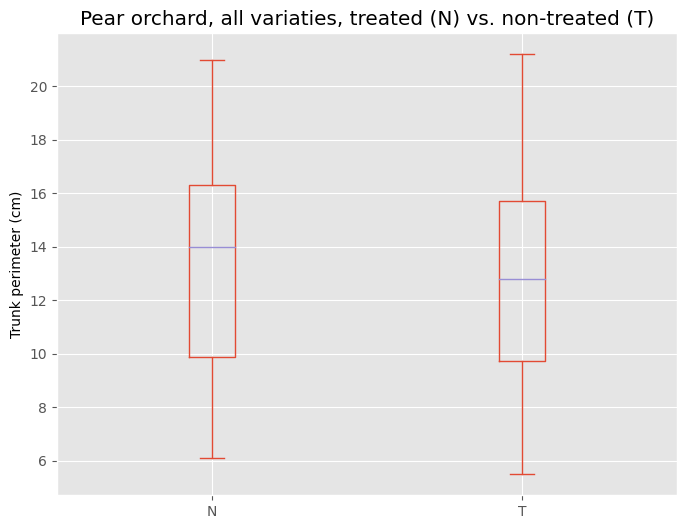

In [594]:
Res_N.plot(kind='box', figsize=(8, 6))
plt.title('Pear orchard, all variaties, treated (N) vs. non-treated (T)')
plt.ylabel('Trunk perimeter (cm)')
plt.show()

Conclusion: There is a clear difference in mean and median trunk perimeter between the treated (N) and non-treated (T) samples. This difference between the two groups is statistically significant, with a P value < 0.05.    

### Differences among varieties and treatments

In [608]:
varieties = {'ER':'Ercolini','CA':'Carmen', 'LI':'Limonera'}
var_list = ['ER','CA','LI']
treat_list = ['N','T']

In [604]:
df.head()

TL,D39,D40,D43,D44,D49,D50,D51,D52,D53,D54,...,M43,M44,M49,M50,M51,M52,M53,M54,M57,M58
Variety,ER,ER,ER,ER,LI,LI,CA,CA,CA,CA,...,ER,ER,LI,LI,CA,CA,CA,CA,LI,LI
Treatment,N,N,T,T,T,T,T,T,N,N,...,T,T,T,T,T,T,N,N,N,N
1,12.4,11.0,9.8,10.1,9.6,9.5,10.4,13.6,13.7,15.0,...,13.2,9.6,10.2,7.2,14.6,15.1,15.6,19.0,9.0,10.2
2,12.6,11.2,9.7,12.8,9.6,9.2,15.0,15.0,17.2,18.3,...,15.5,13.4,10.7,8.7,14.9,17.3,13.8,15.8,9.9,9.8
3,15.0,11.3,11.2,10.3,9.0,10.1,13.8,12.4,16.7,16.5,...,15.6,16.2,9.5,9.5,14.8,16.8,18.7,18.3,9.0,10.7


In [640]:
# Filter by treatment and variety, combinations
fi_1 = []
fi_2 = []
for k in var_list:
    for i in treat_list:
        cond = (df.loc['Treatment'] == i) & (df.loc['Variety'] == k)
        fi_1.append(cond)
        fi_2.append(k+ ', '+i)

In [660]:
# Prepare a list of dataframes, each containing the data for a given combination
df_list = []
for i in fi_1:
    df_list.append(df.loc[:,i])

In [665]:
# Prepare a list of dataframes, each containing the data for a given combination
# Prepare a list of stacked series for analysis, also useful for ANOVA
df_list = []
sr_list = []
ix = 0
for i in fi_1:
    df_list.append(df.loc[:,i])
    aux = df_list[ix].iloc[2:,:].astype(np.float64).stack()
    sr_list.append(aux)
    ix = ix + 1

In [698]:
# Prepare the final dataframe that we will use for stastistics and plotting
Result = pd.DataFrame()
ix = 0
for i in fi_2:
    aux = sr_list[ix].to_frame(name = i).reset_index().drop(['TL'],axis = 1)
    Result [i] = aux[i]
    ix = ix + 1

In [701]:
Result.describe()

,"ER, N","ER, T","CA, N","CA, T","LI, N","LI, T"
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,14.816667,13.606173,15.869444,15.572917,9.337037,9.167901
std,2.420570,2.783909,1.965469,2.190668,1.365179,1.110294
min,8.400000,8.600000,8.900000,8.200000,6.100000,5.500000
25%,13.200000,11.225000,14.725000,13.941667,8.600000,8.600000
50%,14.950000,13.600000,16.100000,15.550000,9.250000,9.300000
75%,16.400000,15.875000,16.958333,17.275000,9.900000,9.900000
max,21.000000,19.500000,21.000000,21.200000,17.900000,12.100000


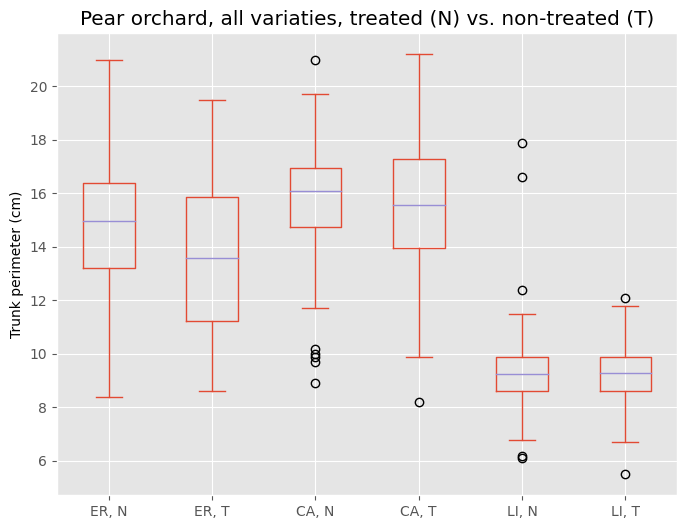

In [702]:
Result.plot(kind='box', figsize=(8, 6))
plt.title('Pear orchard, all variaties, treated (N) vs. non-treated (T)')
plt.ylabel('Trunk perimeter (cm)')
plt.show()

In [712]:

for i in range(0,6,2):
    f_val, p_val = stats.f_oneway(sr_list[i], sr_list[i+1])
    sig = 'difference not statistically siginificant'
    if (p_val < 0.05):
        sig = '--> statistically different'
    print(fi_2[i], fi_2[i+1])
    print( "ANOVA results between N and T groups: F=", f_val, ", P =", p_val)
    print(sig)
    print('\n')

ER, N ER, T
ANOVA results between N and T groups: F= 17.442313275308255 , P = 3.8174582200642186e-05
--> statistically different


CA, N CA, T
ANOVA results between N and T groups: F= 1.6444588456769977 , P = 0.20063720556105835
difference not statistically siginificant


LI, N LI, T
ANOVA results between N and T groups: F= 1.496648919046086 , P = 0.2220822122139969
difference not statistically siginificant




Conclusion: the variaty Ercolini (ER) reacts strongly to the treatment. The variaty Carmen (CA) tendentially reacts to the treatment, however the difference between the samples is not statistically significant. Finally, the variaty Limonera (LI) does not show any reaction to the treatment.   